# EDA OF MARKOV SIMULATION PROJECT

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/simulation_data_clean.csv", parse_dates=["timestamp"], index_col=0)
df.tail()

,customer_no,timestamp,location
61371,51509,2019-09-06 21:50:00,drinks
61372,51509,2019-09-06 21:51:00,checkout
61373,51510,2019-09-06 21:49:00,entrance
61374,51510,2019-09-06 21:50:00,spices
61375,51510,2019-09-06 21:51:00,checkout


In [3]:
def map_day(number):
    first_digit = int(str(number)[0])
    if first_digit == 1:
        return 'Monday'
    elif first_digit == 2:
        return 'Tuesday'
    elif first_digit == 3:
        return 'Wednesday'
    elif first_digit == 4:
        return 'Thursday'
    elif first_digit == 5:
        return 'Friday'
    else:
        return 'Unknown'  # Add an 'Unknown' category for other values

# Apply the mapping function to create the week_day column
df['week_day'] = df['customer_no'].map(map_day)


In [4]:
df

,customer_no,timestamp,location,week_day
0,10001,2019-09-02 07:02:00,entrance,Monday
1,10001,2019-09-02 07:03:00,dairy,Monday
2,10001,2019-09-02 07:04:00,dairy,Monday
3,10001,2019-09-02 07:05:00,checkout,Monday
4,10002,2019-09-02 07:02:00,entrance,Monday
...,...,...,...,...
61371,51509,2019-09-06 21:50:00,drinks,Friday
61372,51509,2019-09-06 21:51:00,checkout,Friday
61373,51510,2019-09-06 21:49:00,entrance,Friday
61374,51510,2019-09-06 21:50:00,spices,Friday


In [5]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['minute'] = pd.to_datetime(df['timestamp']).dt.minute
df

,customer_no,timestamp,location,week_day,hour,minute
0,10001,2019-09-02 07:02:00,entrance,Monday,7,2
1,10001,2019-09-02 07:03:00,dairy,Monday,7,3
2,10001,2019-09-02 07:04:00,dairy,Monday,7,4
3,10001,2019-09-02 07:05:00,checkout,Monday,7,5
4,10002,2019-09-02 07:02:00,entrance,Monday,7,2
...,...,...,...,...,...,...
61371,51509,2019-09-06 21:50:00,drinks,Friday,21,50
61372,51509,2019-09-06 21:51:00,checkout,Friday,21,51
61373,51510,2019-09-06 21:49:00,entrance,Friday,21,49
61374,51510,2019-09-06 21:50:00,spices,Friday,21,50


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_customer_section = df.groupby(["week_day", "location"])["customer_no"].nunique()
df_customer_section

week_day   location
Friday     checkout    1510
           dairy        761
           drinks       688
           entrance    1510
           fruit        874
           spices       633
Monday     checkout    1447
           dairy        720
           drinks       661
           entrance    1447
           fruit        827
           spices       584
Thursday   checkout    1535
           dairy        782
           drinks       632
           entrance    1535
           fruit        872
           spices       613
Tuesday    checkout    1422
           dairy        751
           drinks       581
           entrance    1422
           fruit        827
           spices       543
Wednesday  checkout    1531
           dairy        804
           drinks       652
           entrance    1531
           fruit        884
           spices       565
Name: customer_no, dtype: int64

In [8]:
# Group the data by hours and sections, count the number of unique customers in each group
grouped_data_all = df.groupby(['hour', 'location'])['customer_no'].nunique().reset_index()
grouped_data_all


,hour,location,customer_no
0,6,entrance,10
1,7,checkout,454
2,7,dairy,235
3,7,drinks,234
4,7,entrance,491
...,...,...,...
86,21,dairy,145
87,21,drinks,156
88,21,entrance,274
89,21,fruit,157


## The total number of customers in each section over the time in a week.

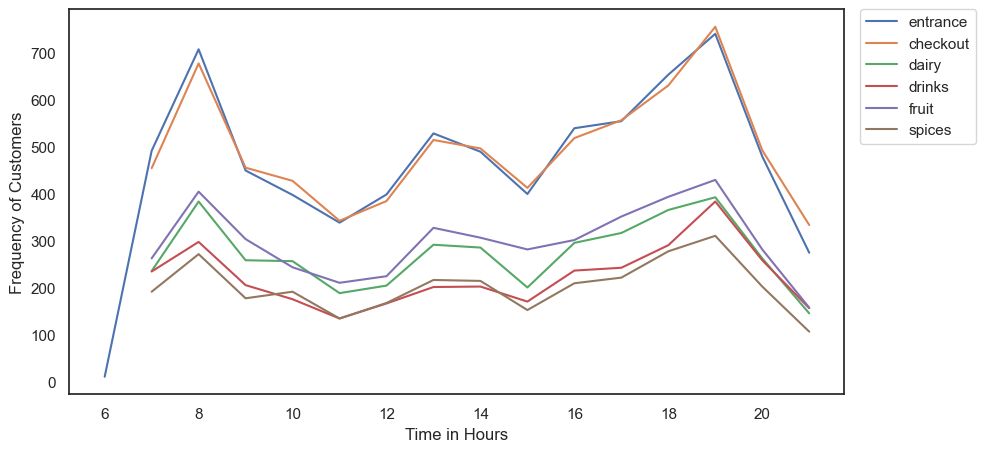

In [9]:
#sns.set(style="darkgrid")
sns.set_theme(style='white')
plt.figure(figsize=(10, 5)) 
sns.lineplot(data=grouped_data_all, x='hour', y="customer_no", hue="location")
plt.xlabel("Time in Hours")
plt.ylabel("Frequency of Customers")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


## The number of customers in each section over time in each weekday.

In [10]:
grouped_data_weekly = df.groupby(['hour', 'week_day','location'])['customer_no'].nunique().reset_index()
grouped_data_weekly

,hour,week_day,location,customer_no
0,6,Friday,entrance,3
1,6,Thursday,entrance,1
2,6,Wednesday,entrance,6
3,7,Friday,checkout,87
4,7,Friday,dairy,42
...,...,...,...,...
448,21,Wednesday,dairy,27
449,21,Wednesday,drinks,29
450,21,Wednesday,entrance,54
451,21,Wednesday,fruit,27


In [11]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday"]

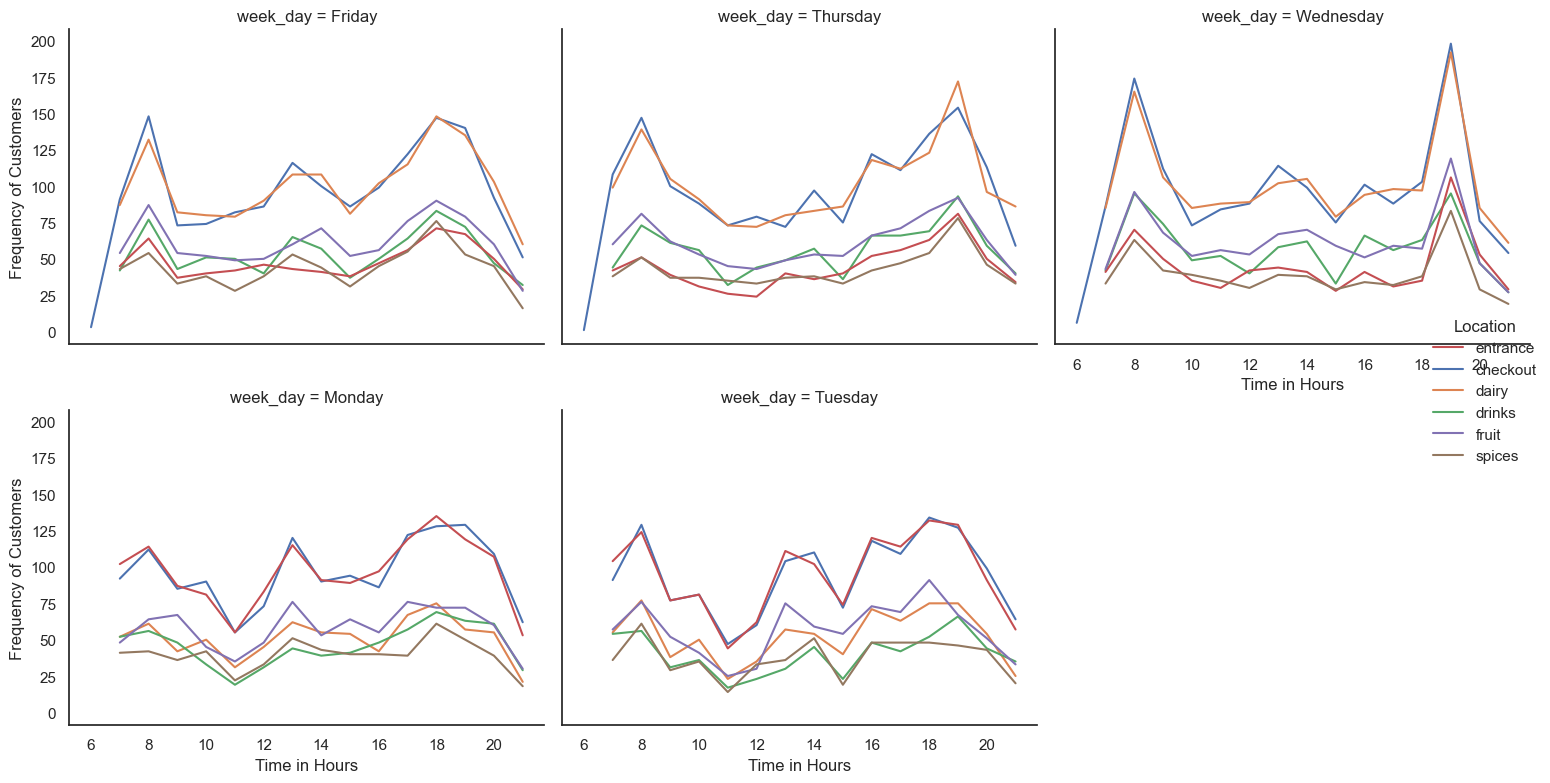

In [12]:
sns.set_theme(style='white')
g = sns.FacetGrid(grouped_data_weekly, col='week_day', col_wrap=3, height=4, aspect=1.2)
g.map(sns.lineplot, 'hour', 'customer_no', 'location')
g.set_axis_labels('Time in Hours', 'Frequency of Customers')
g.add_legend(title='Location')
plt.tight_layout()
plt.show()

## Transtion probabilities for each weekday

### Monday transition probabilities

In [13]:
df_mon = df[df["week_day"]=="Monday"]
df_mon.tail()

,customer_no,timestamp,location,week_day,hour,minute
12217,11446,2019-09-02 21:50:00,dairy,Monday,21,50
12218,11446,2019-09-02 21:51:00,checkout,Monday,21,51
12219,11447,2019-09-02 21:49:00,entrance,Monday,21,49
12220,11447,2019-09-02 21:50:00,fruit,Monday,21,50
12221,11447,2019-09-02 21:51:00,checkout,Monday,21,51


In [14]:
df_mon["loc_next"] = df_mon.groupby("customer_no")["location"].shift(-1)
df_mon

/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_71310/3994568466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon["loc_next"] = df_mon.groupby("customer_no")["location"].shift(-1)


,customer_no,timestamp,location,week_day,hour,minute,loc_next
0,10001,2019-09-02 07:02:00,entrance,Monday,7,2,dairy
1,10001,2019-09-02 07:03:00,dairy,Monday,7,3,dairy
2,10001,2019-09-02 07:04:00,dairy,Monday,7,4,checkout
3,10001,2019-09-02 07:05:00,checkout,Monday,7,5,NaN
4,10002,2019-09-02 07:02:00,entrance,Monday,7,2,dairy
...,...,...,...,...,...,...,...
12217,11446,2019-09-02 21:50:00,dairy,Monday,21,50,checkout
12218,11446,2019-09-02 21:51:00,checkout,Monday,21,51,NaN
12219,11447,2019-09-02 21:49:00,entrance,Monday,21,49,fruit
12220,11447,2019-09-02 21:50:00,fruit,Monday,21,50,checkout


In [15]:
P_mon = pd.crosstab(
    index=df_mon["location"],
    columns=df_mon["loc_next"],
    normalize="index",
)

# Add checkout row
checkout = pd.DataFrame(
    {"checkout": [1], "dairy": [0], "drinks": [0], "fruit": [0], "spices": [0]},
    index=["checkout"],
)
P_mon = pd.concat([P_mon, checkout])

# Add entrance column
P_mon["entrance"] = 0.0

P_mon = P_mon[["entrance", "dairy", "drinks", "fruit", "spices", "checkout"]]
P_mon.to_csv('./data/monday_tp.csv') 

### Tuesday transition probabilities

In [16]:
df_tu = df[df["week_day"] == "Tuesday"]


In [17]:
df_tu["loc_next"] = df_tu.groupby("customer_no")["location"].shift(-1)


/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_71310/1020817256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tu["loc_next"] = df_tu.groupby("customer_no")["location"].shift(-1)


In [18]:
P_tu = pd.crosstab(
    index=df_tu["location"],
    columns=df_tu["loc_next"],
    normalize="index",
)

# Add checkout row
checkout = pd.DataFrame(
    {"checkout": [1], "dairy": [0], "drinks": [0], "fruit": [0], "spices": [0]},
    index=["checkout"],
)
P_tu = pd.concat([P_tu, checkout])

# Add entrance column
P_tu["entrance"] = 0.0

P_tu = P_tu[["entrance", "dairy", "drinks", "fruit", "spices", "checkout"]]
P_tu.to_csv('./data/tuesday_tp.csv')

### Wednesday transition probabilities

In [19]:
df_wed = df[df["week_day"] == "Wednesday"]
df_wed.tail()

,customer_no,timestamp,location,week_day,hour,minute
36131,31531,2019-09-04 21:45:00,entrance,Wednesday,21,45
36132,31531,2019-09-04 21:46:00,drinks,Wednesday,21,46
36133,31531,2019-09-04 21:47:00,drinks,Wednesday,21,47
36134,31531,2019-09-04 21:48:00,drinks,Wednesday,21,48
36135,31531,2019-09-04 21:49:00,checkout,Wednesday,21,49


In [20]:
df_wed["loc_next"] = df_wed.groupby("customer_no")["location"].shift(-1)
df_wed

/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_71310/1853147906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed["loc_next"] = df_wed.groupby("customer_no")["location"].shift(-1)


,customer_no,timestamp,location,week_day,hour,minute,loc_next
23769,30001,2019-09-04 06:59:00,entrance,Wednesday,6,59,fruit
23770,30001,2019-09-04 07:00:00,fruit,Wednesday,7,0,fruit
23771,30001,2019-09-04 07:01:00,fruit,Wednesday,7,1,checkout
23772,30001,2019-09-04 07:02:00,checkout,Wednesday,7,2,NaN
23773,30002,2019-09-04 06:59:00,entrance,Wednesday,6,59,dairy
...,...,...,...,...,...,...,...
36131,31531,2019-09-04 21:45:00,entrance,Wednesday,21,45,drinks
36132,31531,2019-09-04 21:46:00,drinks,Wednesday,21,46,drinks
36133,31531,2019-09-04 21:47:00,drinks,Wednesday,21,47,drinks
36134,31531,2019-09-04 21:48:00,drinks,Wednesday,21,48,checkout


In [21]:
P_wed = pd.crosstab(
    index=df_wed["location"],
    columns=df_wed["loc_next"],
    normalize="index",
)

# Add checkout row
checkout = pd.DataFrame(
    {"checkout": [1], "dairy": [0], "drinks": [0], "fruit": [0], "spices": [0]},
    index=["checkout"],
)
P_wed = pd.concat([P_wed, checkout])

# Add entrance column
P_wed["entrance"] = 0.0

P_wed = P_wed[["entrance", "dairy", "drinks", "fruit", "spices", "checkout"]]
P_wed.to_csv('./data/wednesday_tp.csv')

In [22]:
### Thursday transition probabilities

In [23]:
df_th = df[df["week_day"] == "Thursday"]
df_th.tail()

,customer_no,timestamp,location,week_day,hour,minute
48785,41534,2019-09-05 21:48:00,fruit,Thursday,21,48
48786,41534,2019-09-05 21:49:00,checkout,Thursday,21,49
48787,41535,2019-09-05 21:47:00,entrance,Thursday,21,47
48788,41535,2019-09-05 21:48:00,spices,Thursday,21,48
48789,41535,2019-09-05 21:49:00,checkout,Thursday,21,49


In [24]:
df_th["loc_next"] = df_th.groupby("customer_no")["location"].shift(-1)
df_th

/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_71310/3078764240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_th["loc_next"] = df_th.groupby("customer_no")["location"].shift(-1)


,customer_no,timestamp,location,week_day,hour,minute,loc_next
36136,40001,2019-09-05 06:59:00,entrance,Thursday,6,59,drinks
36137,40001,2019-09-05 07:00:00,drinks,Thursday,7,0,drinks
36138,40001,2019-09-05 07:01:00,drinks,Thursday,7,1,checkout
36139,40001,2019-09-05 07:02:00,checkout,Thursday,7,2,NaN
36140,40002,2019-09-05 07:00:00,entrance,Thursday,7,0,fruit
...,...,...,...,...,...,...,...
48785,41534,2019-09-05 21:48:00,fruit,Thursday,21,48,checkout
48786,41534,2019-09-05 21:49:00,checkout,Thursday,21,49,NaN
48787,41535,2019-09-05 21:47:00,entrance,Thursday,21,47,spices
48788,41535,2019-09-05 21:48:00,spices,Thursday,21,48,checkout


In [25]:
P_th = pd.crosstab(
    index=df_th["location"],
    columns=df_th["loc_next"],
    normalize="index",
)

# Add checkout row
checkout = pd.DataFrame(
    {"checkout": [1], "dairy": [0], "drinks": [0], "fruit": [0], "spices": [0]},
    index=["checkout"],
)
P_th = pd.concat([P_th, checkout])

# Add entrance column
P_th["entrance"] = 0.0

P_th = P_th[["entrance", "dairy", "drinks", "fruit", "spices", "checkout"]]
P_th.to_csv('./data/thursday_tp.csv')

### Friday transition probabilities

In [26]:
df_fr = df[df["week_day"] == "Friday"]
df_fr.tail()

,customer_no,timestamp,location,week_day,hour,minute
61371,51509,2019-09-06 21:50:00,drinks,Friday,21,50
61372,51509,2019-09-06 21:51:00,checkout,Friday,21,51
61373,51510,2019-09-06 21:49:00,entrance,Friday,21,49
61374,51510,2019-09-06 21:50:00,spices,Friday,21,50
61375,51510,2019-09-06 21:51:00,checkout,Friday,21,51


In [27]:
df_fr["loc_next"] = df_fr.groupby("customer_no")["location"].shift(-1)
df_fr

/var/folders/qs/2gryg53s7px3dv5fcj09lsl40000gn/T/ipykernel_71310/374226221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr["loc_next"] = df_fr.groupby("customer_no")["location"].shift(-1)


,customer_no,timestamp,location,week_day,hour,minute,loc_next
48790,50001,2019-09-06 06:59:00,entrance,Friday,6,59,dairy
48791,50001,2019-09-06 07:00:00,dairy,Friday,7,0,dairy
48792,50001,2019-09-06 07:01:00,dairy,Friday,7,1,dairy
48793,50001,2019-09-06 07:02:00,dairy,Friday,7,2,dairy
48794,50001,2019-09-06 07:03:00,dairy,Friday,7,3,spices
...,...,...,...,...,...,...,...
61371,51509,2019-09-06 21:50:00,drinks,Friday,21,50,checkout
61372,51509,2019-09-06 21:51:00,checkout,Friday,21,51,NaN
61373,51510,2019-09-06 21:49:00,entrance,Friday,21,49,spices
61374,51510,2019-09-06 21:50:00,spices,Friday,21,50,checkout


In [28]:
P_fr = pd.crosstab(
    index=df_fr["location"],
    columns=df_fr["loc_next"],
    normalize="index",
)

# Add checkout row
checkout = pd.DataFrame(
    {"checkout": [1], "dairy": [0], "drinks": [0], "fruit": [0], "spices": [0]},
    index=["checkout"],
)
P_fr = pd.concat([P_fr, checkout])

# Add entrance column
P_fr["entrance"] = 0.0

P_fr = P_fr[["entrance", "dairy", "drinks", "fruit", "spices", "checkout"]]
P_fr.to_csv('./data/friday_tp.csv')